In [1]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
from datetime import date

#Read the .csv files.
def electrons_table_maker(year):
    return Table().read_table("Downloads/put in google drive/electrons/" + str(year) + ".csv")

def longitude_table_maker(year):
    return Table().read_table("Downloads/put in google drive/Heliocentric Cartesian Position/" + str(year) + ".csv")

#Find the daily average of electron number density or longitude for each day in a given year.
def avg_daily_electrons(year):
    electrons = electrons_table_maker(year)
    count = 0
    for i in electrons.column(0):
        electrons.column(0)[count] = date(int(i[0:4]), int(i[5:7]), int(i[8:10]))
        count = count + 1
    return electrons.sort(0).group(0, np.mean).relabel(0, "Date").relabel(1, "Electron Number Density")
    
def avg_daily_longitude(year):
    longitude = longitude_table_maker(year)
    longitude = longitude.with_column("Longitude", np.arctan2(longitude.column(2), longitude.column(1)))
    count = 0
    for i in longitude.column(0):
        longitude.column(0)[count] = date(int(i[0:4]), int(i[5:7]), int(i[8:10]))
        count = count + 1
    longitude = longitude.sort(0).group(0, np.mean).relabel(0, "Date").relabel("Longitude mean", "Longitude")
    return longitude.with_column("Longitude", longitude.apply(np.degrees, "Longitude")).select("Date", "Longitude")

In [2]:
#Find the daily averages for each day over the 16 year period and put it all in one table.
data_over_16_years = avg_daily_electrons(2005).join("Date", avg_daily_longitude(2005))

for i in np.arange(2006, 2021):
    data_over_16_years = data_over_16_years.with_rows(avg_daily_electrons(i).join("Date", avg_daily_longitude(i)).rows)

In [3]:
#Seeing how the output looks. The length is less than 365 because some days have no corresponding measurements.
avg_daily_electrons(2015)

Date,Electron Number Density
2015-01-01,3.62872
2015-01-02,9.28085
2015-01-03,7.15998
2015-01-04,7.11126
2015-01-05,5.26295
2015-01-06,5.42045
2015-01-07,9.10669
2015-01-08,6.31621
2015-01-09,3.64661
2015-01-10,4.85937


In [4]:
avg_daily_longitude(2015)

Date,Longitude
2015-01-01,100.57
2015-01-02,101.579
2015-01-03,102.589
2015-01-04,103.599
2015-01-05,104.608
2015-01-06,105.618
2015-01-07,106.627
2015-01-08,107.637
2015-01-09,108.647
2015-01-10,109.656


In [5]:
plots.rc('font', size=15)          # controls default text sizes
plots.rc('axes', titlesize=15)     # fontsize of the axes title
plots.rc('axes', labelsize=15)    # fontsize of the x and y labels
plots.rc('xtick', labelsize=15)    # fontsize of the tick labels
plots.rc('ytick', labelsize=15)    # fontsize of the tick labels
plots.rc('legend', fontsize=10)    # legend fontsize
plots.rc('figure', titlesize=15)  # fontsize of the figure title

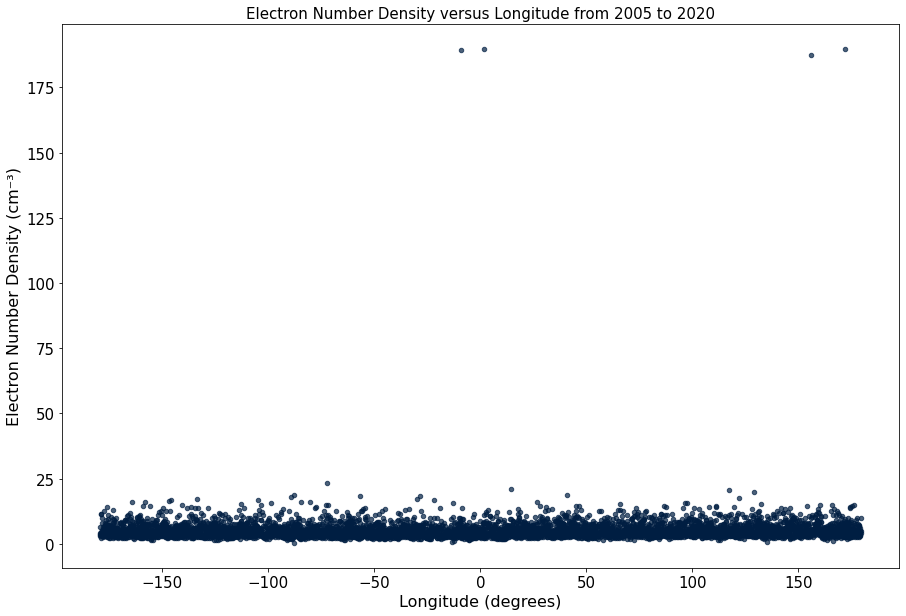

In [6]:
data_over_16_years.scatter("Longitude", "Electron Number Density", width=15, height=10)
plots.title("Electron Number Density versus Longitude from 2005 to 2020")
plots.xlabel("Longitude (degrees)")
plots.ylabel("Electron Number Density (cm⁻³)")
plots.savefig("Daily Average Electron Number Density versus Longitude over 16 years (Before bins and without y-limits).png")

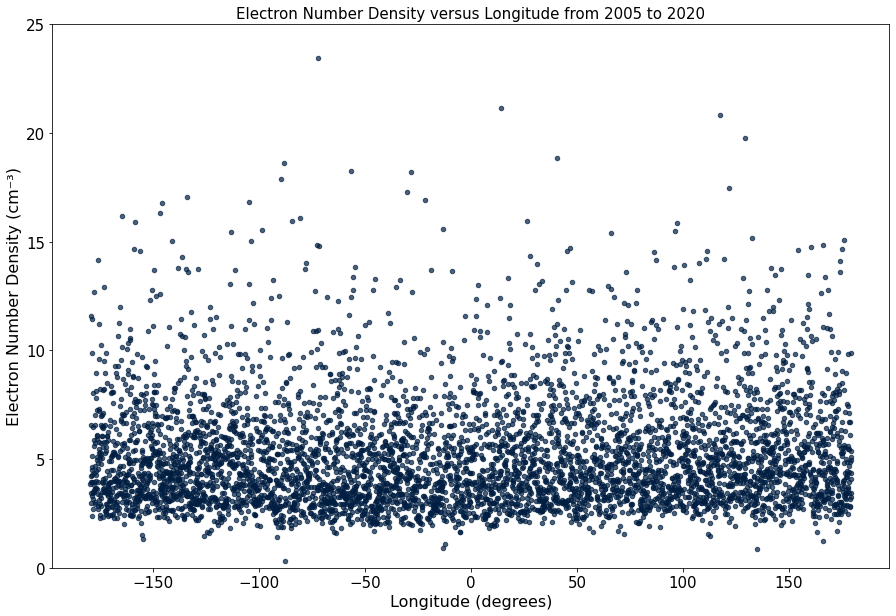

In [7]:
data_over_16_years.scatter("Longitude", "Electron Number Density", width=15, height=10)
plots.title("Electron Number Density versus Longitude from 2005 to 2020")
plots.xlabel("Longitude (degrees)")
plots.ylabel("Electron Number Density (cm⁻³)")
plots.ylim(0, 25)
plots.savefig("Daily Average Electron Number Density versus Longitude over 16 years (Before bins).png")

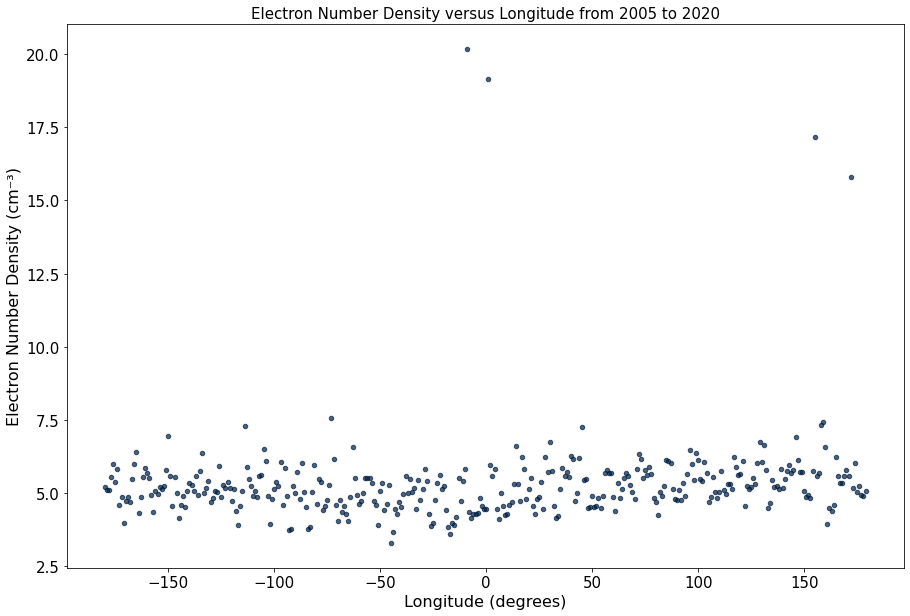

In [8]:
data_over_16_years.with_column("Longitude (binned)", data_over_16_years.apply(np.floor, "Longitude")).drop(["Date", "Longitude"]).group("Longitude (binned)", np.mean).scatter("Longitude (binned)", width=15, height=10)
plots.title("Electron Number Density versus Longitude from 2005 to 2020")
plots.xlabel("Longitude (degrees)")
plots.ylabel("Electron Number Density (cm⁻³)")
plots.savefig("Daily Average Electron Number Density versus Longitude over 16 years (No y-limits).png")

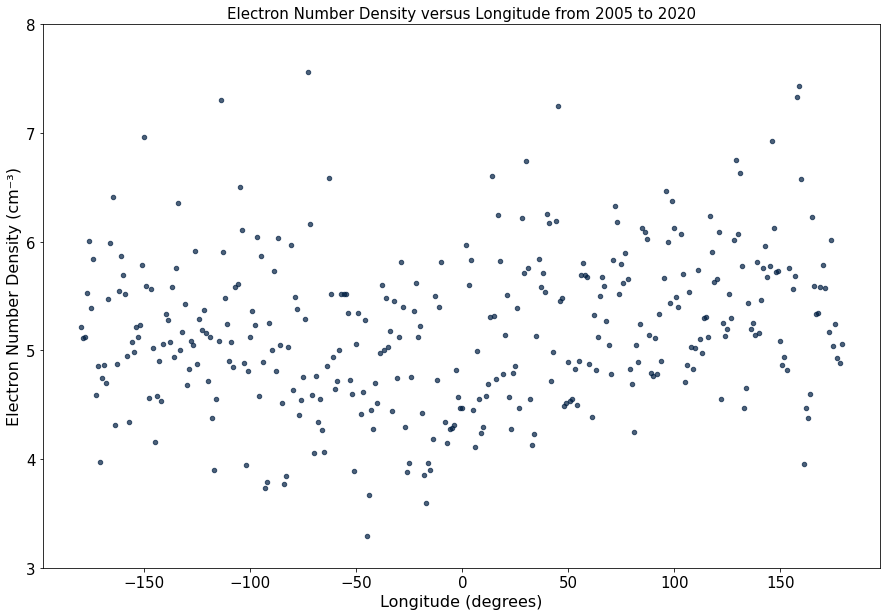

In [9]:
data_over_16_years.with_column("Longitude (binned)", data_over_16_years.apply(np.floor, "Longitude")).drop(["Date", "Longitude"]).group("Longitude (binned)", np.mean).scatter("Longitude (binned)", width=15, height=10)
plots.title("Electron Number Density versus Longitude from 2005 to 2020")
plots.xlabel("Longitude (degrees)")
plots.ylabel("Electron Number Density (cm⁻³)")
plots.ylim(3, 8)
plots.savefig("Daily Average Electron Number Density versus Longitude over 16 years.png")

In [10]:
#All 360 degrees.
len(data_over_16_years.with_column("Longitude (binned)", data_over_16_years.apply(np.floor, "Longitude")).drop(["Date", "Longitude"]).group("Longitude (binned)", np.mean).column(0))

360

In [11]:
#The average change in longitude is around 1 degree a day (about 360 degrees per year).
np.mean(abs(np.diff(data_over_16_years.column("Longitude")))[abs(np.diff(data_over_16_years.column("Longitude"))) < 50])

1.07980749262372